In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pyart
from pyart.io.sband_archive import read_sband_archive
import singledop


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/usr/local/tools/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
filename = u"Z_RADR_I_Z9515_20160623063600_O_DOR_SA_CAP.bin"
radar = read_sband_archive(filename)

/usr/local/tools/anaconda3/lib/python3.6/site-packages/pyart/io/sband_archive.py:205: UserWarning: Gate spacing is not constant, interpolating data in scans [0, 2, 4, 5, 6, 7, 8, 9, 10] for moment REF.
  UserWarning)


In [8]:
sd_test = singledop.SingleDoppler2D(radar=radar, 
                                    range_limits=[0, 100], 
                                    grid_spacing=0.25,
                                    L=1, 
                                    sweep_number=1, 
                                    name_vr='velocity',
                                    thin_factor=[4, 4],
                                    grid_edge=120,
                                    sigma=1,
                                   )

5340 total observations (M)


(20, 60)

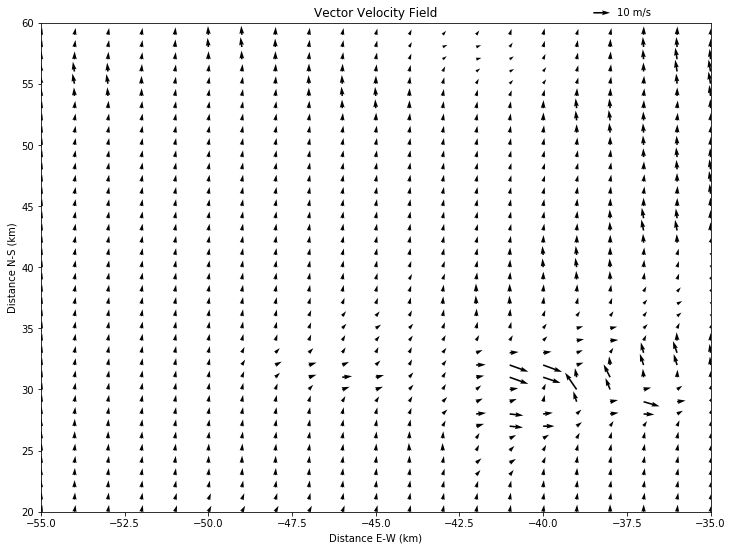

In [9]:
display = singledop.AnalysisDisplay(sd_test)

fig, ax = plt.subplots(figsize=(12, 9))
display.plot_velocity_vectors(ax=ax, legend=10, scale=400, thin=1)
ax.set_xlim([-55, -35])
ax.set_ylim([20, 60])

In [19]:
sd_test = singledop.SingleDoppler2D(radar=radar, 
                                    range_limits=[0, 100], 
                                    grid_spacing=0.25,
                                    L=2, 
                                    sweep_number=1, 
                                    name_vr='velocity',
                                    thin_factor=[4, 4],
                                    grid_edge=120,
                                    sigma=1,
                                   )

5340 total observations (M)


(20, 60)

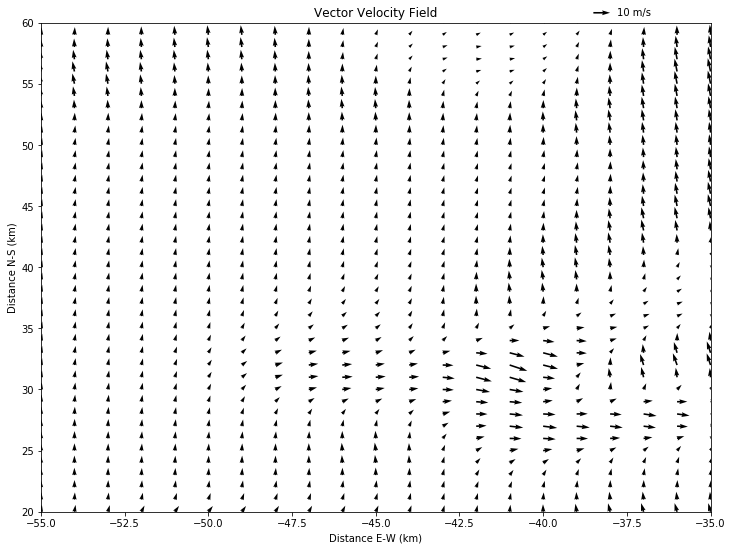

In [20]:
display = singledop.AnalysisDisplay(sd_test)

fig, ax = plt.subplots(figsize=(12, 9))
display.plot_velocity_vectors(ax=ax, legend=10, scale=400, thin=1)
ax.set_xlim([-55, -35])
ax.set_ylim([20, 60])

(20, 60)

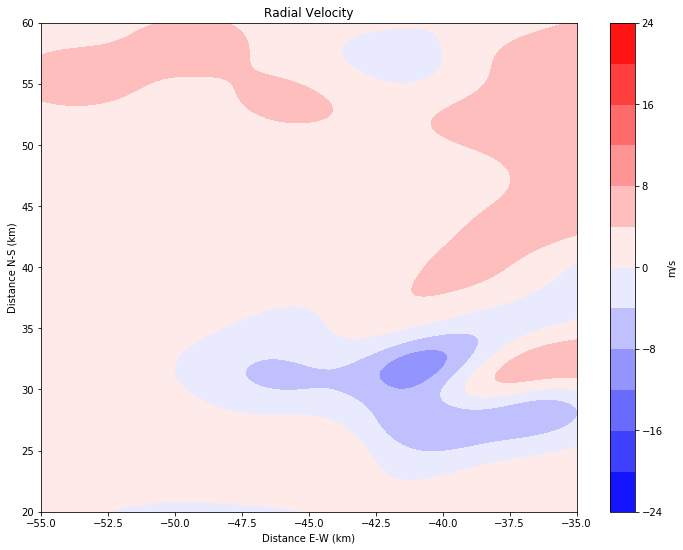

In [21]:
fig, ax = plt.subplots(figsize=(12, 9))
display.plot_velocity_contours(ax=ax)
ax.set_xlim([-55, -35])
ax.set_ylim([20, 60])

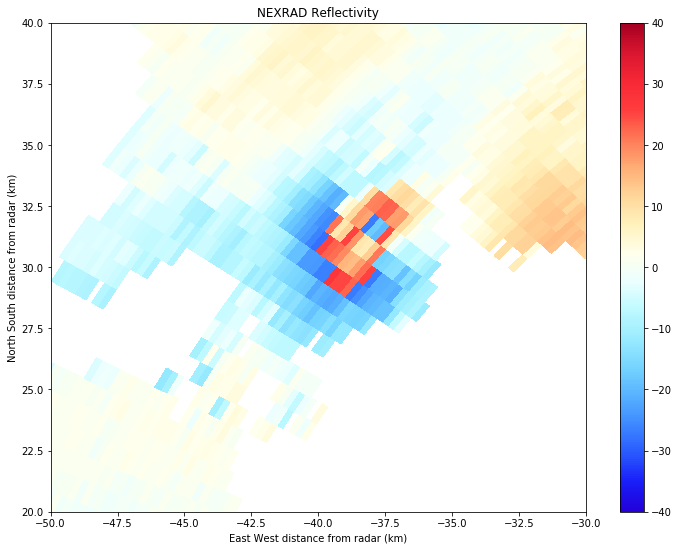

In [22]:
display = pyart.graph.radardisplay.RadarDisplay(radar)
fig, ax = plt.subplots(figsize=(12, 9))
display.plot('velocity', 1, title='NEXRAD Reflectivity',
             vmin=-40, vmax=40, colorbar_label='', ax=ax)
ax.set_xlim([-50, -30])
ax.set_ylim([20, 40])

plt.show()